In [1]:
from tensorflow.keras.models import load_model
import glob
from PIL import Image
import random
import matplotlib.pyplot as plt

#tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input

In [6]:
# Loading model
model = load_model("../../sandbox/AA_test_kaggle/310_bird_species/model_vgg.h5")
#tf.saved_model.save(model, ".")
#tf.saved_model.load("../model/model_VGG.h5")
model.save(".")

INFO:tensorflow:Assets written to: ./assets


In [27]:
model = load_model("../model/")

In [13]:
datagen_vgg = ImageDataGenerator(preprocessing_function=preprocess_input,
                                 zoom_range=(0.8, 1.2)) 
#
train_generator_vgg = datagen_vgg.flow_from_directory('/Users/victor/code/victorbnnt/sandbox/AA_test_kaggle/310_bird_species/images/test',
                                                      batch_size=128,
                                                      target_size=(224,224),
                                                      class_mode='categorical')

Found 1575 images belonging to 315 classes.


In [46]:
import json
with open('../raw_data/classes_indices.json', 'w') as fp:
    json.dump(train_generator_vgg.class_indices, fp)

In [14]:
# this json file comes from an ImageDataGenerator. See Kaggle 310 species classification last chapter
with open("../raw_data/classes_indices.json") as json_file:
    classes_indices = json.load(json_file)

In [15]:
len(classes_indices)

315

In [16]:
# Loading species
filelist = glob.glob('/Users/victor/code/victorbnnt/sandbox/AA_test_kaggle/310_bird_species/images/test/*')
species = [fname.split("/")[-1] for fname in filelist]
species[0:5] + ["..."]

['RUFUOS MOTMOT',
 'WHITE TAILED TROPIC',
 'KOOKABURRA',
 'TREE SWALLOW',
 'AMERICAN REDSTART',
 '...']

In [17]:
%%time
# Loading test images

data = dict({"test": []})
target = dict({"test": []})

for spec in species:
    filelist = glob.glob('/Users/victor/code/victorbnnt/sandbox/AA_test_kaggle/310_bird_species/images/test/' + spec + '/*.jpg')
    target["test"].extend([spec for _ in filelist])
    data["test"].extend([np.array(Image.open(fname)).reshape(-1, 224, 224, 3) for fname in filelist])
data["test"] = np.stack(data["test"], axis=0)

CPU times: user 1.18 s, sys: 211 ms, total: 1.39 s
Wall time: 1.96 s


In [18]:
# applying preprocessing to all images
data_prepro = np.array(list(map(preprocess_input, data["test"])))

In [19]:
data_prepro[0].shape

(1, 224, 224, 3)

In [28]:
for k in range(130, 150):
    image_id_to_predict = random.randint(0, data_prepro.shape[0])
    image_to_predict = data_prepro[image_id_to_predict]
    prediction = model.predict(image_to_predict)
    image_predicted_id = list(np.round(prediction)[0]).index(1)
    label_str = list(classes_indices.keys())[list(classes_indices.values()).index(image_predicted_id)]
    print("True: " + target["test"][image_id_to_predict] + " --- Pred: " + label_str)

True: GLOSSY IBIS --- Pred: GLOSSY IBIS
True: STRAWBERRY FINCH --- Pred: STRAWBERRY FINCH
True: GUINEAFOWL --- Pred: GUINEAFOWL
True: BLACK-CAPPED CHICKADEE --- Pred: BLACK-CAPPED CHICKADEE
True: OCELLATED TURKEY --- Pred: OCELLATED TURKEY
True: HELMET VANGA --- Pred: HELMET VANGA
True: BLACK-THROATED SPARROW --- Pred: BLACK-THROATED SPARROW
True: MALABAR HORNBILL --- Pred: MALABAR HORNBILL
True: BOBOLINK --- Pred: BOBOLINK
True: RED FODY --- Pred: RED FODY
True: PARAKETT  AKULET --- Pred: PARAKETT  AKULET
True: HORNBILL --- Pred: HORNBILL
True: UMBRELLA BIRD --- Pred: UMBRELLA BIRD
True: HELMET VANGA --- Pred: HELMET VANGA
True: ENGGANO MYNA --- Pred: ENGGANO MYNA
True: RED WISKERED BULBUL --- Pred: RED WISKERED BULBUL
True: WHITE THROATED BEE EATER --- Pred: WHITE THROATED BEE EATER
True: OCELLATED TURKEY --- Pred: OCELLATED TURKEY
True: BLACK-NECKED GREBE --- Pred: BLACK-NECKED GREBE
True: PYGMY KINGFISHER --- Pred: PYGMY KINGFISHER


In [65]:
# loading an image
!ls ../images

Vermilion_Flycatcher.jpeg blueJay.jpeg


In [78]:
filelist_test = glob.glob('../images/*.jpeg')
[val for val in filelist_test]
image_to_predict = np.array(Image.open(filelist_test[-1]).resize((224, 224))).reshape(-1, 224, 224, 3)

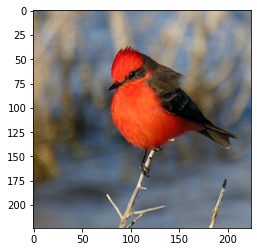

In [82]:
plt.imshow(image_to_predict.reshape(224, 224, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


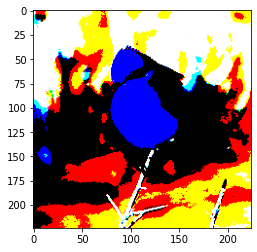

In [86]:
plt.imshow(preprocess_input(image_to_predict).reshape(224, 224, 3))

In [90]:
predicted_val = np.argmax(model.predict(preprocess_input(image_to_predict)))
list(classes_indices.keys())[list(classes_indices.values()).index(predicted_val)]

'VERMILION FLYCATHER'

In [30]:
import requests
from io import BytesIO
#image_to_load = "https://www.allaboutbirds.org/guide/assets/photo/311635911-1280px.jpg"
image_to_load = "http://bib.ge/img_animal/57187767bbbibbb.jpg"

In [31]:
response = requests.get(image_to_load)
response

<Response [200]>

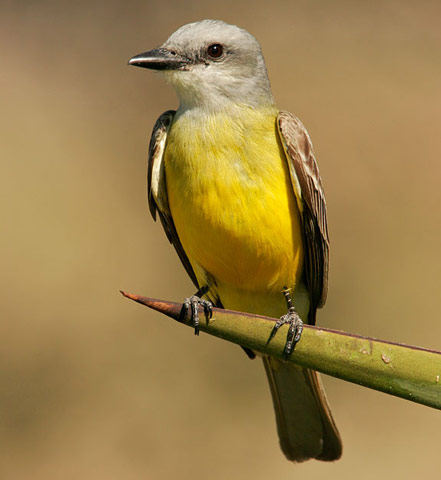

In [32]:
img = Image.open(BytesIO(response.content))
img

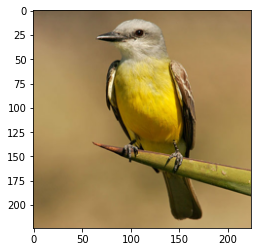

In [111]:
image_to_predict = np.array(Image.open(BytesIO(response.content)).resize((224, 224))).reshape(-1, 224, 224, 3)
plt.imshow(image_to_predict.reshape(224, 224, 3))

In [112]:
predicted_val = np.argmax(model.predict(preprocess_input(image_to_predict)))
list(classes_indices.keys())[list(classes_indices.values()).index(predicted_val)]

'COUCHS KINGBIRD'